In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_train = pd.read_csv('train.csv')
data_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# HomePlanet

In [31]:
#HomePlanet distribution
planets = data_train['HomePlanet']
planets = planets.fillna('Unknown')

planets_counts = planets.value_counts()
print(planets_counts)

HomePlanet
Earth      4602
Europa     2131
Mars       1759
Unknown     201
Name: count, dtype: int64


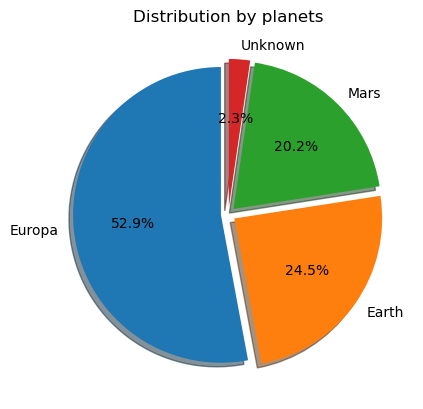

In [52]:
planets_labels = planets.unique()
planets_values = planets_counts.values

fig, ax = plt.subplots()
explode = (0.05, 0.05, 0.05, 0.05)
ax.pie(planets_values, labels = planets_labels, 
       autopct='%1.1f%%', startangle = 90, explode = explode, shadow = True)
plt.title('Distribution by planets')
plt.show()

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      False           727
            True           1404
Mars        False           839
            True            920
Unknown     False            98
            True            103
dtype: int64


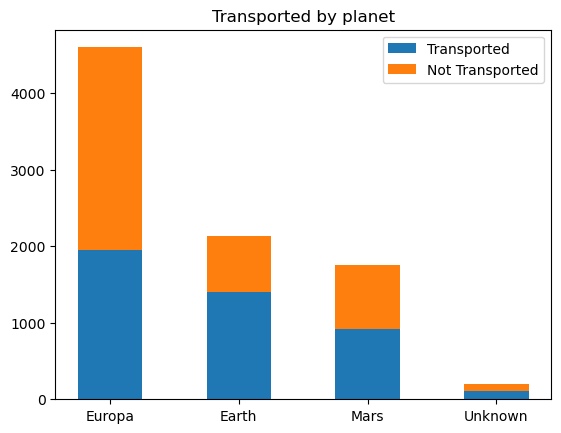

In [83]:
#shows who transported with which plannet
transported = data_train['Transported']
transported = transported.fillna(('Unknown'))

planets_transported = data_train.groupby([planets, transported]).size()
transported_true = planets_transported.xs(True, level='Transported').values
transported_false = planets_transported.xs(False, level='Transported').values
print(planets_transported)

species = ('Europa', 'Earth', 'Mars', 'Unknown')
weight_counts = {
    "Transported": transported_true,
    "Not Transported": transported_false,
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.5

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

plt.title('Transported by planet')
ax.legend(loc="upper right")
plt.show()

# CryoSleep

In [79]:
cryosleep = data_train['CryoSleep']
cryosleep = cryosleep.fillna('Unknown')

cryosleep_counts = cryosleep.value_counts()
print(cryosleep_counts)

CryoSleep
False      5439
True       3037
Unknown     217
Name: count, dtype: int64


CryoSleep  Transported
False      False          3650
           True           1789
True       False           554
           True           2483
Unknown    False           111
           True            106
dtype: int64
[1789 2483  106]
[3650  554  111]


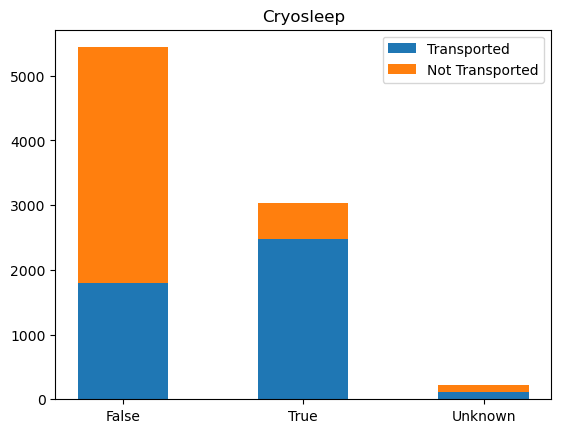

In [82]:
cryosleep_transported = data_train.groupby([cryosleep, transported]).size()
cryosleep_transported_true = cryosleep_transported.xs(True, level='Transported').values
cryosleep_transported_false = cryosleep_transported.xs(False, level='Transported').values
print(cryosleep_transported)

species = ('False', 'True', 'Unknown')
weight_counts = {
    "Transported": cryosleep_transported_true,
    "Not Transported": cryosleep_transported_false,
}

fig, ax = plt.subplots()
bottom = np.zeros(3)
width = 0.5

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

plt.title('Cryosleep')
ax.legend(loc="upper right")
plt.show()